# Intervalo de confiança para Média 

Como vimos, o estimador por intervalo para a média $\mu$ tem a forma: <br />
<center> $[\overline{X}-\varepsilon;\overline{X}+\varepsilon]$ </center> <br />
<span style=color:blue> Como calcular o erro amostral $\varepsilon$? <span/>

Fixando um nível de confiança $1-\alpha$, que é a probabilidade da média amostral $\overline{X}$ estar a uma distância de, no máximo, $\varepsilon$ da média populacional $\mu$ (desconhecida), tem-se que:

<center>$P(\mu - \varepsilon \leq \overline{X} \leq \mu + \varepsilon) = 1 - \alpha$ </center>

Confiança: em geral, $1-\alpha = 0.95 \Rightarrow \alpha = 0.05$ ou $\alpha = 5\%$

Aplica-se a transformação para a norma padrão Z. <br/>
<span style=color:blue> ATENÇÃO: subtrai-se a média de $\overline{X}$ e divide-se pelo desvio-padrão de $\overline{X}$!!!! <span/>

<center>$P(\mu - \varepsilon \leq \overline{X} \leq \mu + \varepsilon) = $ <br/>
$= P\left( \frac{-\varepsilon}{\frac{\sigma}{\sqrt{n}}} \leq \frac{\overline{X}-\mu}{\frac{\sigma}{\sqrt{n}}} \leq \frac{\varepsilon}{\frac{\sigma}{\sqrt{n}}}\right )$ <br/>
$= P\left( \frac{-\varepsilon \sqrt{n}}{\sigma} \leq Z \leq \frac{\varepsilon \sqrt{n}}{\sigma}\right )$
</center> 


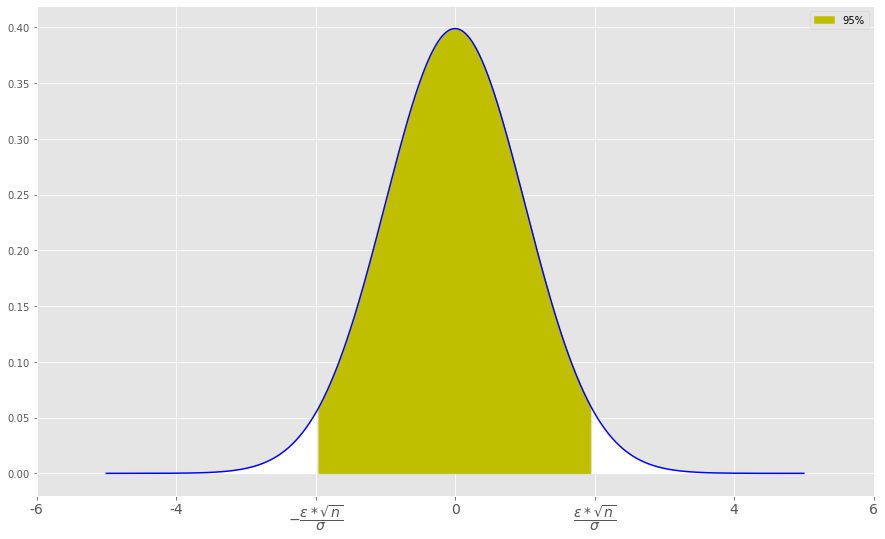

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as stats
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,9)
mean=0
std=1
x=np.linspace(-5, 5,1000)
iq=stats.norm(mean,std)
fig = plt.plot(x,iq.pdf(x),'b')

#calda esquerda
ltail=np.arange(-5,-1.96,0.1)
plt.fill_between(ltail,iq.pdf(ltail),color='w')

#calda direita
rtail=np.arange(1.96,5, 0.1)
plt.fill_between(rtail,iq.pdf(rtail),color='w')

#intervalo de confiança
xp = np.arange(-1.96,1.96, 0.1)
plt.fill_between(xp,iq.pdf(xp),color='y', label='95%')

locs, labels = plt.xticks()
plt.xticks(locs, ['-6', '-4', '$-\dfrac{\epsilon*\sqrt{n}}{\sigma}$', 
                  '0', '$\dfrac{\epsilon*\sqrt{n}}{\sigma}$', '4','6'], 
           fontsize=14)

plt.legend()
plt.show()

<span style=color:blue> Qual o valor de z para 95%? <span/>

<span style='color:blue'>
Exemplo 1: Não se conhece o consumo médio de combustível de automóveis da marca T. Sabe-se, no entanto, que o desvio padrão do consumo de combustível de automóveis dessa marca é $\sigma=10$ km/l. Na análise de 100 automóveis da marca T, obteve-se consumo médio de combustível de $\overline{X}=8$ km/l. Encontre um intervalo de confiança para o consumo médio de combustível dessa marca de carro, $\mu$. Adote um coeficiente de confiança igual a 95%.
<span/>

In [2]:
#Erro na estimativa intervalar:
sigma = 10
xbarra = 8
n=100
epsilon = stats.norm.ppf(0.975)*sigma/np.sqrt(n)   

In [3]:
print("erro amostral = ", round(epsilon,3))

erro amostral =  1.96


In [4]:
#Intervalo de confiança de 95%
# [Xbarra - epsilon; Xbarra + epsilon]
print('[', xbarra - epsilon, '; ', xbarra + epsilon, ']')

[ 6.040036015459946 ;  9.959963984540053 ]


***

### <span style=color:red> Cálculo do intervalo de confiança com scipy stats <span/>

In [5]:
conf_int = stats.norm.interval(0.95, loc=xbarra, scale=sigma/np.sqrt(n)) 
print("intervalo de confiança: ")
print(conf_int)

intervalo de confiança: 
(6.040036015459946, 9.959963984540053)


<span style='color:blue'>
Exemplo 2: Deseja-se estimar o tempo médio de estudo ($\mu$, em anos) da população adulta de um município. Sabe-se que o tempo de estudo tem distribuição normal com desvio padrão $\sigma = 2,5$ anos. Foram entrevistados $n = 25$ indivíduos, obtendo-se para essa amostra, um tempo médio de estudo igual a $10,5$ anos. Obter um intervalo de 90% de confiança para o tempo médio de estudo populacional $\mu$.
<span/>

In [6]:
conf_int = stats.norm.interval(0.90, loc=10.5, scale=2.5/np.sqrt(25)) 
print("intervalo de confiança: ")
print(conf_int)

intervalo de confiança: 
(9.677573186524263, 11.322426813475737)


## <span style = 'background:yellow'> Exemplo para vários níveis de confiança </span>

In [24]:
media = 8
sigma = 10
n = 100
#
conf_int = stats.norm.interval(0.99, loc=media, scale=sigma/10) 
print("intervalo de confiança 99%: ", [round(conf_int[0], 2), round(conf_int[1], 2)])
#
conf_int = stats.norm.interval(0.95, loc=media, scale=sigma/10) 
print("intervalo de confiança 95%: ", [round(conf_int[0], 2), round(conf_int[1], 2)])
#
conf_int = stats.norm.interval(0.90, loc=media, scale=sigma/10) 
print("intervalo de confiança 90%: ", [round(conf_int[0], 2), round(conf_int[1], 2)])
#
conf_int = stats.norm.interval(0.80, loc=media, scale=sigma/10) 
print("intervalo de confiança 80%: ", [round(conf_int[0], 2), round(conf_int[1], 2)])

type(conf_int[0])

intervalo de confiança 99%:  [5.42, 10.58]
intervalo de confiança 95%:  [6.04, 9.96]
intervalo de confiança 90%:  [6.36, 9.64]
intervalo de confiança 80%:  [6.72, 9.28]


numpy.float64

***

# Distribuição t de Student
### Se a amostra de tamanho $n$ for selecionada de uma população com distribuição normal com média $\mu$ e variância $\sigma^2$ desconhecidas, a variável aleatória <br/>
<span style="font-size:20pt">
<center> $\frac{\overline{X} - \mu}{\frac{s}{\sqrt{n}}}$  </center>   
</span>

### tem distribuição $t$ de Student com $n-1$ graus de liberdade. 

### Comentários sobre a distribuição $t$ de Student

* A forma da distribuição $t$ reflete a variabilidade extra introduzida pelo estimador s;
* Para cada possível valor dos graus de liberdade, há uma diferente distribuição $t$;
* As distribuições com menores graus de liberdade (g.l.) são mais espalhadas; 
* Conforme g.l. aumentam, a distribuição $t$ se aproxima da distribuição normal padrão;

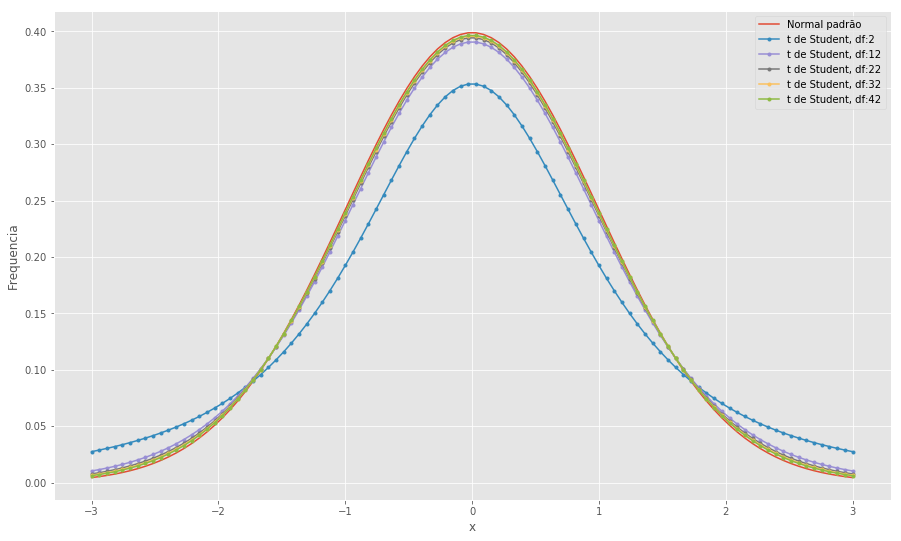

In [49]:
fig, ax = plt.subplots()
mu = 0
sigma = 1
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x), label='Normal padrão')
ax.set_xlabel('x')
ax.set_ylabel('Frequencia')
# sample sizes
sizes = list()
simbolo = ['-','>','o', 'o', '*', '>']
#
for n in range (2, 52, 10):
    sizes.append(n)
#
# cria diversas t de student variando graus de liberdade
for df in sizes:
    i=0;
    s = 't de Student, df:' + str(df)
    ax.plot(x, stats.t.pdf(x, df), marker='.', label= s)


plt.legend()
plt.show()

In [14]:
t=stats.t.ppf(0.975, df=999)
print(t)

1.9623414611334487


### Erro amostral com $\sigma$ desconhecido

<span style="font-size:20pt">
<center> $\varepsilon = t_{n-1} \frac{s}{\sqrt{n}}$  </center>   
</span>

<span style='color:blue'>
Exemplo 3:Não se conhece o consumo médio $\mu$ e o desvio padrão $\sigma$ do consumo de combustível de automóveis da marca T. Sabe-se, no entanto, que <span/> <span style='color:red'> a distribuição do consumo de combustível de automóveis dessa marca (da variável $X$) é aproximadamente normal. <span/> <span style='color:blue'> Na análise de 10 automóveis da marca T, obteve-se consumo médio de combustível de $\overline{X} = 8$ km/l com um desvio padrão igual a $s=10$ km/l. Encontre um intervalo de confiança para o consumo médio de combustível dessa marca de carro. Adote um coeficiente de confiança igual a 95%.
<span/>

In [70]:
#Erro amostral: erro = t*s/raiz(n)
erro = stats.t.ppf(0.975, df=9)*10/np.sqrt(10)
print(round(erro, 3))

7.154


In [73]:
#Intervalo de confiança de 95%
# [Xbarra - epsilon; Xbarra + epsilon]
print('[', round(8 - erro,2), '; ', round(8 + erro,2), ']')

[ 0.85 ;  15.15 ]


## Valores de t

In [74]:
# Para n=10
print(stats.t.ppf(0.975, df=9))

2.2621571627409915


50


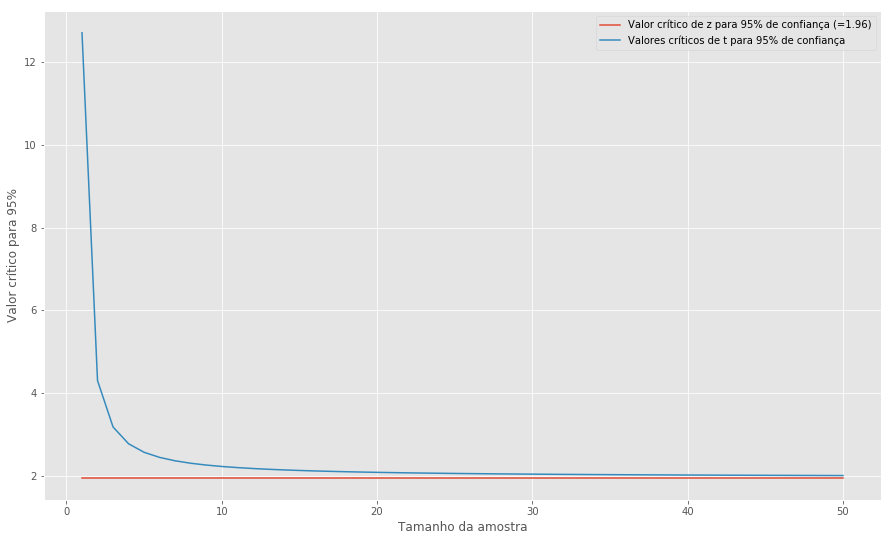

In [93]:
#Variando valores de n para confiança de 95% 
sz = list()
for n in range(2, 52, 1):
    sz.append(n)
#
print(len(sz))
# cria diversas t de student variando graus de liberdade
x = np.linspace(1,len(sz),len(sz))

z = list()
t = list()
for df in sz:
    z.append(1.96)
    t.append(stats.t.ppf(0.975, df-1)) 

fig, ax = plt.subplots()
ax.plot(x,z, label = 'Valor crítico de z para 95% de confiança (=1.96)')
ax.plot(x,t, label = 'Valores críticos de t para 95% de confiança')

plt.xlabel('Tamanho da amostra')
plt.ylabel('Valor crítico para 95%')
plt.legend()
plt.show()

<span style="color:red">
Para $n$ grande, a distribuição $t$ de Student aproxima-se da distribuição normal. Ou seja, usar $t$ é praticamente equivalente à usar $z$ no cálculo do erro amostral.
<span/>

***

### <span style=color:red> Cálculo do intervalo de confiança com scipy stats <span/>

In [20]:
#Sintaxe: interval(confidence, df, loc=0, scale=1)
# No exemplo 3
lb, ub = stats.t.interval(0.95, 9, 8, 10/np.sqrt(10))
print(round(lb,2))
print(round(ub,2))

0.85
15.15


<span style='color:blue'>
Exemplo 4. Para estimar a renda semanal média de garçons de restaurantes em uma grande cidade, é colhida uma amostra da renda semanal de 75 garçons. A média e o desvio padrão amostrais encontrados são R\$ 227 e R\$ 15 respectivamente. Determine um intervalo de confiança, com coeficiente de confiança de 90%, para a renda média semanal.
<span/>

In [98]:
#Cálculo com t de Student: erro=t*s/raiz(n)
stats.t.interval(0.90, 74, 227, 15/np.sqrt(75))

(224.11491103142058, 229.88508896857942)

In [101]:
#Cálculo com normal padrão erro=z*s/raiz(n)
stats.norm.interval(0.90, 227, 15/np.sqrt(75))

(224.1510299471061, 229.8489700528939)

<span style='color:blue'>
Exemplo 5. Considere que a distribuição do tempo de espera, em minutos, na fila de votação numa certa zona eleitoral é aproximadamente normal com uma média $\mu$ e desvio padrão $\sigma$ desconhecidos.
Se uma amostra de tamanho 12 da população de eleitores dessa zona eleitoral resultou em um tempo médio de espera é $\overline{X}= 21.7$ minutos e $s=4.6$ minutos, qual tamanho deve ter a amostra para se obter um intervalo de confiança com erro amostral $\varepsilon$ de 1 minuto, com 99% de confiança?
<span/>

In [125]:
#Cálculo usando a t de Student
n = stats.t.ppf(0.995, df=11)**2 * 4.6**2
print("Tamanho da amostra:", round(n))

Tamanho da amostra: 204.0


## Faz sentido o cálculo acima?
#### Se $n=204$ qual seria o erro amostral?

In [127]:
erro = stats.t.ppf(0.995, df=203)*4.6/np.sqrt(204)
print("Erro amostral:", round(erro,2))

Erro amostral: 0.84


In [122]:
# Cálculo com normal padrão z
n = stats.norm.ppf(0.995)**2 * 4.6**2
print("Tamanho da amostra:", round(n))

Tamanho da amostra: 140.0


In [126]:
erro = stats.norm.ppf(0.995)*4.6/np.sqrt(140)
print("Erro amostral:", round(erro,2))

Erro amostral: 1.0


***

# Inferência para proporção populacional

<span style="color:blue">
Exemplo 6: Suponha que estamos interessados em estimar a proporção de alunos da UNINOVE que foram ao cinema pelo menos uma vez no último mês. <br/> Observa-se $n$ elementos, extraídos ao acaso e com reposição da população. Para cada elemento selecionado (aluno entrevistado, nesse caso), verifica-se a presença (sucesso) ou não (fracasso) da característica de interesse: 'o aluno foi ao cinema ao menos uma vez no último mês'. <br/>
Se em uma pesquisa com $n = 500$ estudantes, foram obtidos X = 100 sucessos, tem-se a proporção amostral: <br/>
</span>
 
<span style='font-size:20pt'>
<center> $\hat{p}=\frac{X}{n}$ <center/>
</span>
   
<span style="color:blue">
É um estimador pontual para a proporção de alunos que foram ao cinema no último mês: $p$.
</span>

In [128]:
#Cálxulo da prporção amostral
phat = 100/500
print(phat)

0.2


### Qual a distribuição amostral de $\hat{p}$?

A variável X que é o número de elementos na amostra que apresentam a característica de interesse (número de sucessos), segue uma distribuição binomial com parâmetros $n$ e $p$ <br/>
<center> Notação: $X \sim b(n,p)$ </center>

<span style="color:blue">
Exemplo 7: Uma moeda honesta é lançada $n = 10$ vezes em idênticas condições. Determinar a probabilidade de ocorrer cara entre 40% e 70% das vezes, inclusive.
<span/>

In [23]:
#X = número de caras (sucesso)
#P(X = 4) = fdp(x=4) = stats.binom.pmf(x=4,n,p)
#P(X = 5) = fdp(x=5) = stats.binom.pmf(x=5,n,p)
#P(X = 6) = fdp(x=6) = stats.binom.pmf(x=6,n,p)
#P(X = 7) = fdp(x=7) = stats.binom.pmf(x=7,n,p)

#P(4 <= X <= 7) = P(4)+P(5)+P(6)+P(7)
n = 10
p = 0.5   #probabilidade de sucesso
q = 1 - p # = 0.5 probabilidade de fracasso
values = [4,5,6,7]

probabilidade = sum(stats.binom.pmf(x,n,p) for x in values)
print(stats.binom.pmf(4,n,p))
print(stats.binom.pmf(5,n,p))
print(stats.binom.pmf(6,n,p))
print(stats.binom.pmf(7,n,p))
print('soma:', round(probabilidade,3))

0.20507812500000022
0.24609375000000025
0.20507812500000022
0.11718750000000014
soma: 0.773


### Gráfico da distribuição binomial

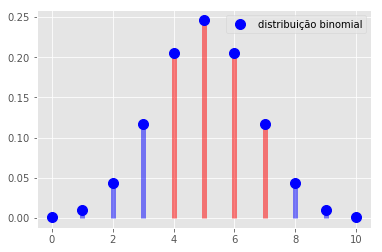

In [24]:
fig, ax = plt.subplots(1, 1)
x = np.arange(0,11,1)
ax.plot(x, stats.binom.pmf(x, n, p), 'bo', ms=10, label='distribuição binomial')
ax.vlines(x, 0, stats.binom.pmf(x, n, p), colors=['b','b','b','b','r','r','r','r','b','b'], lw=5, alpha=0.5)
plt.legend()
plt.show()

### <span style="color:red"> A distribuição binomial pode ser aproximada por uma normal com parâmetros: <br/>
<center>
    <span style="font-size:20pt">
$\mu = n*p$ 
    </span> <br/>  
    <span style="font-size:20pt">
$\sigma^2 = n*p*(1-p)$
    </span> <br/>
    
</span>
    </center>

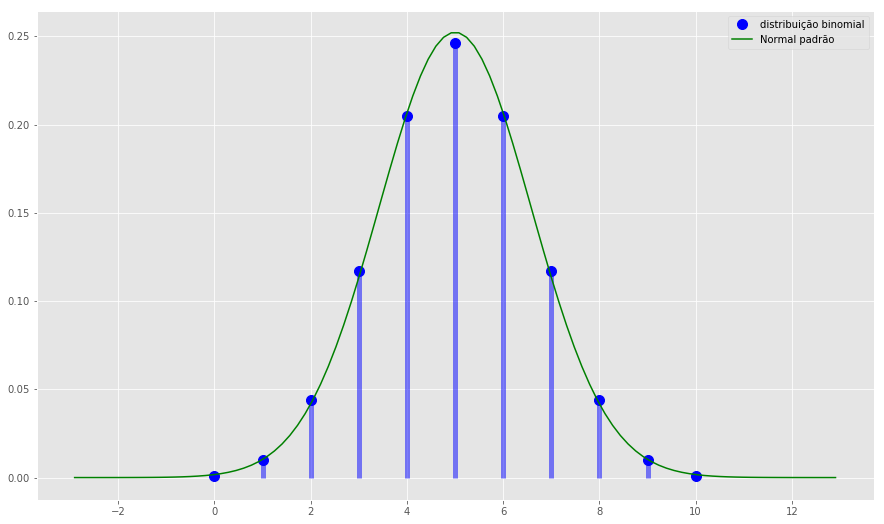

In [165]:
fig, ax = plt.subplots(1, 1)
x = np.arange(0,11,1)
ax.plot(x, stats.binom.pmf(x, n, p), 'bo', ms=10, label='distribuição binomial')
ax.vlines(x, 0, stats.binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

#distribuicao normal
mu = n*p
sigma = np.sqrt(n*p*(1-p))
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), 'g', label='Normal padrão')

plt.legend()
plt.show()

# Para a distribuição amostral de $\hat{p}$, temos:

<span style="font-size=40pt">
<center>$ 
P(p - \varepsilon \leq \hat{p} \leq p + \varepsilon) = 1-\alpha = 0.95$ <br/>
$= P(p - \varepsilon \leq \frac{X}{n} \leq p + \varepsilon)$ <br/>
$= P(np - n\varepsilon \leq X \leq np + n\varepsilon)$ <br/>
$= P\left( \frac{-n\varepsilon}{\sqrt{np(1-p)}} \leq \frac{X-np}{\sqrt{np(1-p)}} \leq \frac{n\varepsilon}{\sqrt{np(1-p)}}\right )$ <br/>
$= P\left( \frac{-n\varepsilon}{\sqrt{np(1-p)}} \leq Z \leq \frac{n\varepsilon}{\sqrt{np(1-p)}}\right )$
</center> 
<span/>

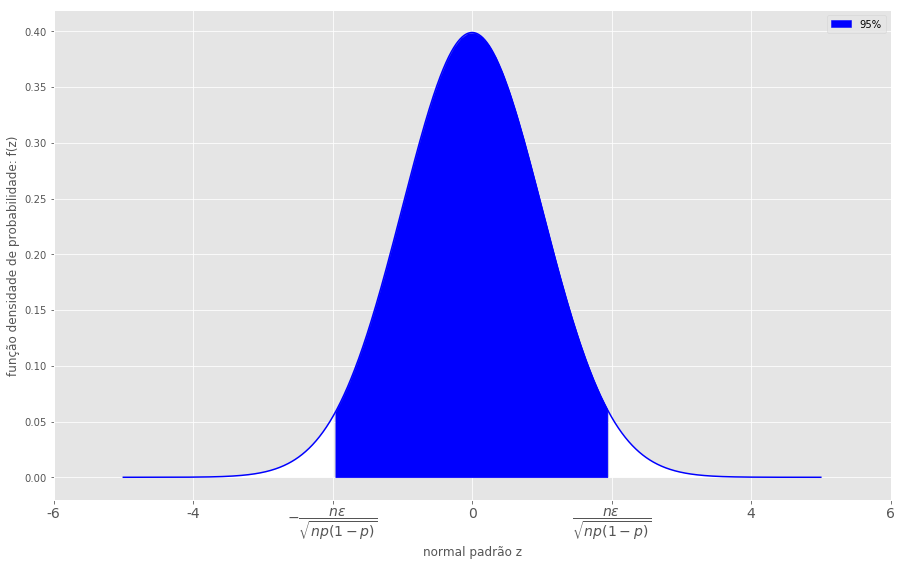

In [182]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as stats
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,9)
mean=0
std=1
x=np.linspace(-5, 5,1000)
iq=stats.norm(mean,std)
fig = plt.plot(x,iq.pdf(x),'b')

#calda esquerda
ltail=np.arange(-5,-1.96,0.1)
plt.fill_between(ltail,iq.pdf(ltail),color='w')

#calda direita
rtail=np.arange(1.96,5, 0.1)
plt.fill_between(rtail,iq.pdf(rtail),color='w')

#intervalo de confiança
xp = np.arange(-1.96,1.96, 0.1)
plt.fill_between(xp,iq.pdf(xp),color='b', label='95%')

locs, labels = plt.xticks()
plt.xticks(locs, ['-6', '-4', '$-\dfrac{n\epsilon}{\sqrt{np(1-p)}}$', 
                  '0', '$\dfrac{n\epsilon}{\sqrt{np(1-p)}}$', '4','6'], 
           fontsize=14)

plt.xlabel('normal padrão z')
plt.ylabel('função densidade de probabilidade: f(z)')
plt.legend()
plt.show()

# Intervalo de confiança para p
### Define-se o erro amostral da forma:

<span style=font-size:20pt>
    $\varepsilon = z\sqrt{\frac{p(1-p)}{n}}$
    <span/>

In [194]:
1.96*np.sqrt(0.25/500)

1.959963984540054

<span style="color:blue">
Exemplo 8: Para o exemplo dos estudantes da Uninove, com $n=500$, $p=0.5$ e $X=100$, qual o intervalo de $95\%$ para a proporção populacional
    <span/>

In [200]:
#erro amostral
n=500
p=0.5
X=100
phat = X/n
#
epsilon = stats.norm.ppf(0.975) * np.sqrt((p*(1-p))/n)
print('epsilon:', round(epsilon,3))
#Intervalo de confiança de 95%
# [phat - epsilon; phat + epsilon]
print('Intervalo de confiança: [', round(phat - epsilon,3), '; ', round(phat + epsilon,3), ']')

epsilon: 0.044
Intervalo de confiança: [ 0.156 ;  0.244 ]


# Por que usamos $p=0.5$ no exemplo acima?

## Na prática, usamos a estimativa $\hat{p}$

In [204]:
#erro amostral
n=500
X=100
phat = X/n
p = phat
#
epsilon = stats.norm.ppf(0.975) * np.sqrt((p*(1-p))/n)
print('epsilon:', round(epsilon,3))
#Intervalo de confiança de 95%
# [phat - epsilon; phat + epsilon]
print('Intervalo de confiança: [', round(phat - epsilon,3), '; ', round(phat + epsilon,3), ']')

epsilon: 0.035
Intervalo de confiança: [ 0.165 ;  0.235 ]


# Calculando com a biblioteca statsmodels do python

In [166]:
from statsmodels.stats.proportion import proportion_confint

In [203]:
# Para o exemplo dos estudantes da Uninove
proportion_confint(count=100,    # Number of "successes"
                   nobs=500,    # Number of trials
                   alpha=(1 - 0.95))

(0.16493909837693674, 0.23506090162306328)